# Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area,
 number of    bathrooms, etc.
       
- To know the accuracy of the model, i.e. how well these variables can predict house prices.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## importing the dataset

In [2]:
housing = pd.read_csv("Housing.csv")

# data Exploratory

In [3]:
#checking the head of the data set
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#getting some more knowledge our dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [5]:
# looking at some statistical information about our data
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#checking for null values
housing.isnull().sum()
print('count of all the null values',housing.isnull().sum().sum())

count of all the null values 0


In [7]:
# second way...You could subtract the total length from the count of non-nan values:
count_nan = len(housing) - housing.count()
print(count_nan)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### There are no null values in our dataset

# Visualizing the the data

(array([140.,   0.,   0.,   0.,   0., 227.,   0.,   0.,   0., 178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

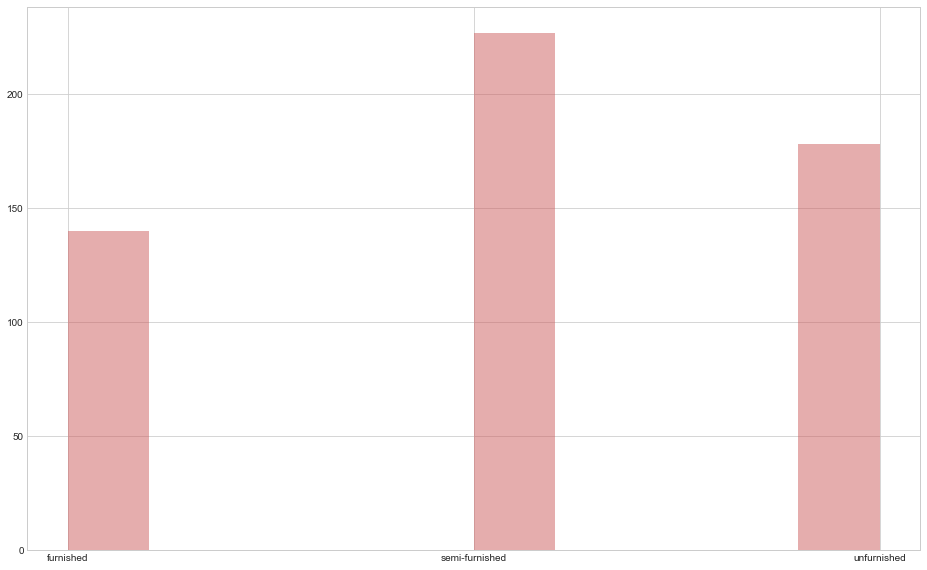

In [8]:
plt.figure(figsize = (16, 10))
sns.set_style('whitegrid')
plt.hist(housing['furnishingstatus'], color="indianred", alpha = 0.5)

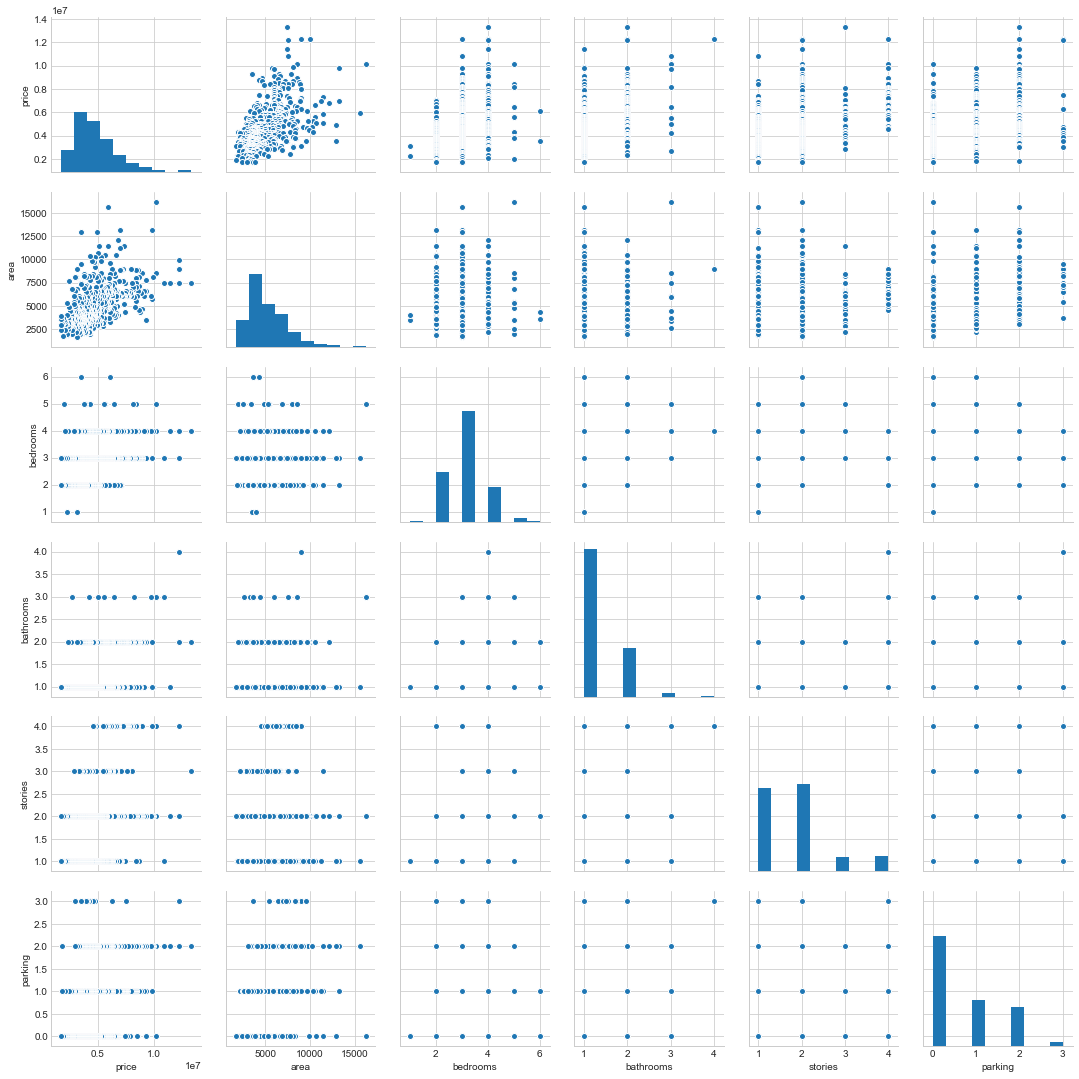

In [9]:
sns.pairplot(housing)

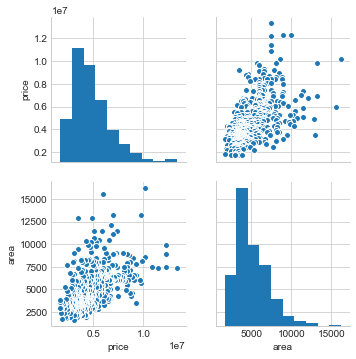

In [10]:
sns.pairplot(housing[['price', 'area']])

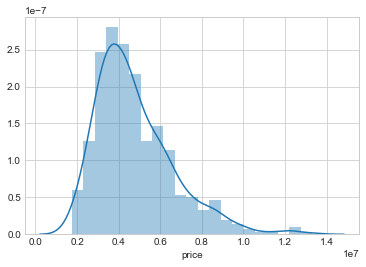

In [11]:
sns.distplot(housing['price'], norm_hist=True)

In [12]:
?sns.distplot

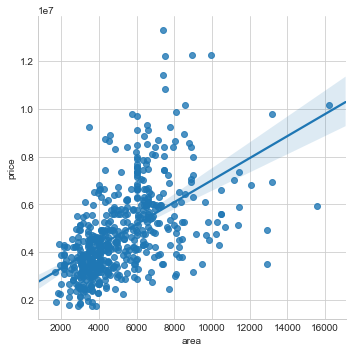

In [13]:
sns.lmplot('area','price', data=housing)

### Feature Engineering

In [14]:
#Converting the categorical data into numeric
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [15]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
# Creating a dummy variable for 'furnishingstatus'
dummy_vars = pd.get_dummies(housing['furnishingstatus'])

In [17]:
dummy_vars.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [18]:
# scaping the trap variable
dummy_vars = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [19]:
dummy_vars.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [20]:
#concatenation of housing data set with dummy vars
housing = pd.concat([housing, dummy_vars], axis=1)

In [21]:
#checking the head of data set
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [22]:
# we no longer neeed the column furnishingstatus'
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [23]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# feature scaling through normalization method

In [24]:
#defining a normalisation function 
def normalized(x):
    return ((x - min(x)) / max(x) - min(x))
#  applying normalized ( ) to all columns 
housing.apply(normalized)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,-1.749999e+06,-1649.643827,-0.500000,-0.75,-0.50,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,-1.749999e+06,-1649.548765,-0.500000,-0.25,-0.25,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,-1.749999e+06,-1649.487037,-0.666667,-0.75,-0.75,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,-1.749999e+06,-1649.638889,-0.500000,-0.75,-0.75,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,-1.749999e+06,-1649.643827,-0.500000,-1.00,-0.75,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
5,-1.749999e+06,-1649.638889,-0.666667,-0.50,-1.00,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,1.0,0.0
6,-1.749999e+06,-1649.572222,-0.500000,-0.50,-0.25,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0,0.0
7,-1.749999e+06,-1649.101852,-0.333333,-0.50,-0.75,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
8,-1.749999e+06,-1649.601852,-0.500000,-1.00,-0.75,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.0,0.0
9,-1.749999e+06,-1649.746914,-0.666667,-0.75,-0.25,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0


## spliting the data into dep. and indep. variables

In [25]:
X = housing.drop('price', axis = 1)
y = housing['price']


In [26]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [27]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

# spliting the data set into training and test set

In [28]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# building the linear model

In [29]:
import statsmodels.api as sm
x_train_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_constant).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           8.83e-83
Time:                        22:10:22   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     367   BIC:                         1.171e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.426e+04   3.14e+05     

In [31]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [32]:
# Calculating Vif value|
vif_cal(input_data=housing, dependent_col="price")


,Var,Vif
1,bedrooms,16.65
2,bathrooms,9.42
0,area,8.28
3,stories,7.88
4,mainroad,6.88
11,semi-furnished,2.39
6,basement,2.02
12,unfurnished,2.01
9,parking,1.99
8,airconditioning,1.77


# Correlation matrix

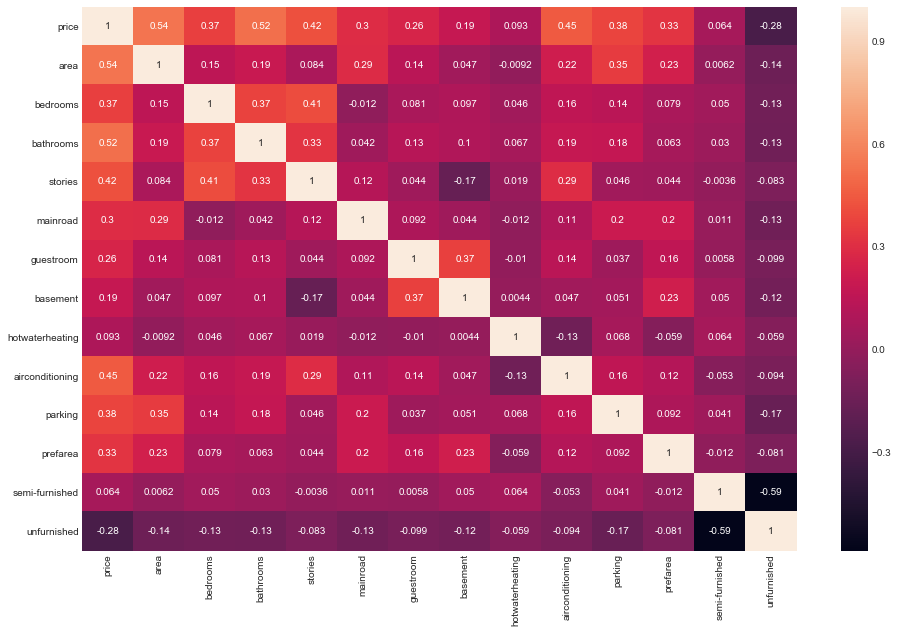

In [33]:
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), annot=True)

### as per our analysis, we found that 'bedrooms' variable is highly correlated and hence needs to be removed from our model building

In [42]:
# Dropping highly correlated variables and insignificant variables
x_train_dropped = x_train_constant.drop('bedrooms', axis=1)
lm_2 = sm.OLS(y_train, x_train_dropped).fit()

In [43]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           2.35e-83
Time:                        22:17:04   Log-Likelihood:                -5814.9
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     368   BIC:                         1.171e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.292e+05   2.65e+05     

### Dropping the Variable and Updating the Model

In [45]:
vif_cal(input_data=housing.drop('bedrooms', axis = 1), dependent_col='price')

,Var,Vif
1,bathrooms,8.01
0,area,7.72
3,mainroad,6.77
2,stories,6.34
10,semi-furnished,2.24
8,parking,1.98
5,basement,1.92
11,unfurnished,1.86
7,airconditioning,1.77
9,prefarea,1.49


In [47]:
# rebuilding the model without the dropped variable
x_train_dropped = x_train_dropped.drop('semi-furnished', axis = 1)
lm_3 = sm.OLS(y_train, x_train_dropped).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           2.73e-84
Time:                        22:18:56   Log-Likelihood:                -5814.9
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     369   BIC:                         1.170e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.365e+05   2.41e+05     

In [48]:
# recalculating the vif
vif_cal(input_data=housing.drop(['bedrooms','semi-furnished'], axis=1), dependent_col="price")

,Var,Vif
1,bathrooms,7.81
0,area,7.59
3,mainroad,6.60
2,stories,6.25
8,parking,1.98
5,basement,1.90
7,airconditioning,1.74
9,prefarea,1.49
4,guestroom,1.46
10,unfurnished,1.40


In [49]:
### Dropping the Variable and Updating the Model
x_train_dropped = x_train_dropped.drop('basement', axis=1)
lm_4 = sm.OLS(y_train, x_train_dropped).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           3.13e-84
Time:                        22:19:38   Log-Likelihood:                -5817.4
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     370   BIC:                         1.170e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.264e+05   2.39e+05     

In [50]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
0,area,7.59
1,bathrooms,7.37
3,mainroad,6.52
2,stories,6.01
7,parking,1.98
6,airconditioning,1.74
8,prefarea,1.44
9,unfurnished,1.40
4,guestroom,1.30
5,hotwaterheating,1.09


## Making Predictions Using the Final Model

In [51]:
x_test_4 = sm.add_constant(x_test)
x_test_4 = x_test_4.drop(["bedrooms","semi-furnished","basement"], axis=1)

In [52]:
# Making predictions
y_pred_m4 = lm_4.predict(x_test_4)

Text(0,0.5,'Housing Price')

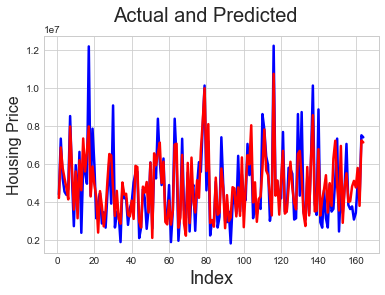

In [53]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

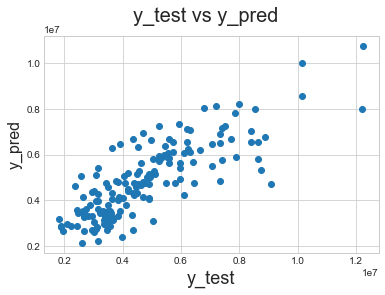

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   